In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
pd.set_option('display.max_rows', None)

In [82]:
data = pd.read_csv('Real_State_Bogota.csv')
data.head()

,longitude,latitude,stratum,bathrooms,constructed_area,house_age,bedrooms,parking,administration,floor,rent_price,facilities
0,-74.053660,4.660556,6,4,237.0,23,3,3,2600000.0,7,14000000,"['Acceso Pavimentado', 'Alarma', 'Amoblado', '..."
1,-74.046431,4.679071,5,1,28.0,4,1,0,0.0,3,2200000,"['Acceso Pavimentado', 'Ascensor', 'Baño Indep..."
2,-74.048398,4.700991,5,2,97.0,12,2,2,0.0,0,4500000,[]
3,-74.045721,4.671554,6,4,167.0,23,3,2,0.0,3,11900000,"['Ascensor', 'Barra estilo americano', 'Baño A..."
4,-74.050727,4.700429,5,2,78.0,23,3,1,0.0,3,4000000,"['Acceso Pavimentado', 'Ascensor', 'Baño Indep..."


In [83]:
data['facilities'] = data['facilities'].apply(ast.literal_eval)

In [84]:
#Se contabilizan las comodidades mas comunes en data set 
facilities = {}
for i in data['facilities']:
    for j in i:
        facilities[j] = facilities.get(j, 0) + 1

n_rows = data.shape[0]
#Ahora se identificaran las comodidades menos comunes para descartarlas de los datos
low_importance_facilities = []
for i in facilities:
    if (facilities[i]/n_rows) <= 0.05:
        low_importance_facilities.append(i) 
print(low_importance_facilities)

['Cochera', 'Cancha de Squash', 'Baño compartido', 'Garaje / Parqueadero(s)', 'Portería / Vigilancia', 'Rio / Quebrada cercano(a)', 'Servicios independientes', 'Despensa', 'Duplex', 'Ubicada en edificio', 'En condominio', 'Cuarto de Escoltas', 'Piso en Alfombra', 'En Edificio', 'En zona Comercial', 'Escalera de Emergencia', 'Parqueadero interno', 'Zona Campestre', 'Árboles frutales', 'Bombas de gasolina', 'Cableado de Red', 'Puerta de seguridad', 'Restaurantes', 'Aire Acondicionado', 'Zona Industrial', 'Vivienda Bifamiliar', 'Asador', 'Seguridad', 'Control de acceso digital', 'Tarjetas inteligentes', 'PentHouse', 'Cancha de Tennis', 'Jaula de Golf', 'Bahias de parqueo', 'Esquinero', 'Puerta eléctrica', 'Baños comunales', 'Baños Públicos', 'Con administrador', 'Parque industrial', 'Bahía exterior de parqueo', 'Tanques de Agua', 'Altura restringida', 'Servicio de Alimentación', 'Piso de alta resistencia', 'Ascensores Comunales', 'Parqueadero Subterraneo', 'Cancha de Futbol', 'Gabinete de

In [85]:
data['facilities'] = data['facilities'].apply(lambda lista: [item for item in lista if item not in low_importance_facilities ])

In [86]:
# Se crearon y añadieron todas la columnas de comodidades encontradas al dataset
new_cols = pd.DataFrame(0, index=data.index, columns=list(facilities.keys()))
data = pd.concat([data, new_cols], axis=1)
data.shape

(315, 144)

In [99]:
#Se asigna el valor 1 a las columnas que estan en la lista de facilities
for idx, i in enumerate(data['facilities']):
    for j in i:
        data.at[idx, j] = 1
data = data.drop(columns=['facilities'])

In [110]:
facilities.keys()

dict_keys(['Acceso Pavimentado', 'Alarma', 'Amoblado', 'Ascensor', 'Balcón', 'Baño Auxiliar', 'Baño Independiente', 'Cerca de Zona Urbana', 'Chimenea', 'Circuito cerrado de TV', 'Citófono', 'Closet', 'Cochera', 'Cocina Integral', 'Colegios / Universidades', 'Cuarto de servicio', 'Depósito / Bodega', 'En conjunto cerrado', 'Estudio', 'Garaje(s)', 'Gimnasio', 'Hall de Alcobas', 'Instalación de gas', 'Jardín', 'Parqueadero Visitantes', 'Parques cercanos', 'Piso en Baldosa /  Mármol', 'Portería / Recepción', 'Salón Comunal', 'Sobre vía principal', 'Supermercados / C.Comerciales', 'Trans. Público cercano', 'Vigilancia', 'Vista panorámica', 'Zona de lavandería', 'Zona Infantil', 'Zona Residencial', 'Zonas Verdes', 'Oficina de negocios', 'Sala de internet', 'Terraza', 'Vivienda Multifamiliar', 'Zona Comercial', 'Barra estilo americano', 'Caldera', 'Calentador', 'Cancha de Squash', 'Planta Eléctrica', 'Cerca centro comercial', 'Piso en Madera', 'Shut de basura', 'Baño compartido', 'Cerca a sec

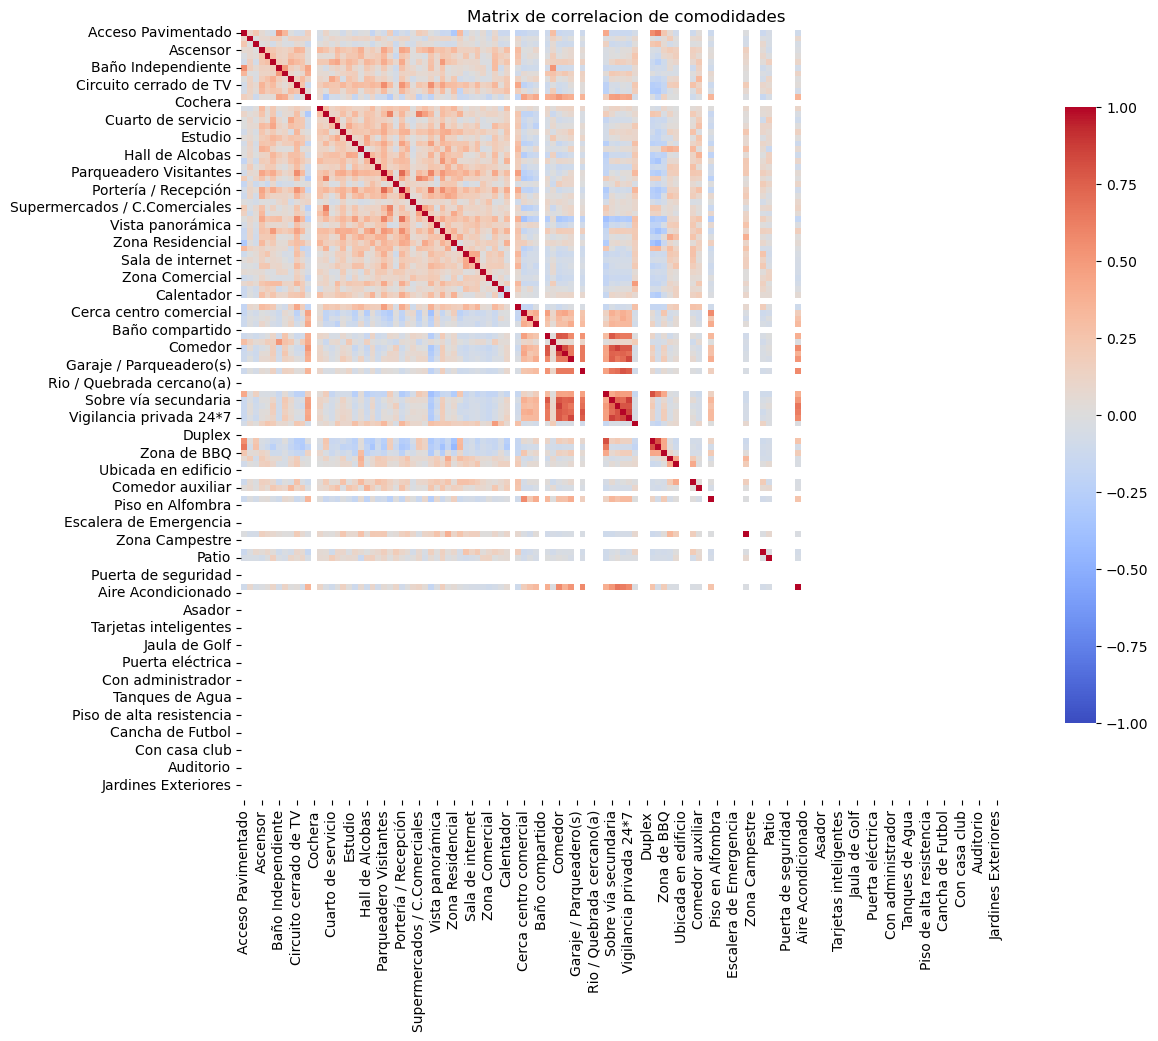

In [126]:
df_facilities = data[facilities.keys()]
corr_facilities = df_facilities.corr(numeric_only=True)

n_vars = corr.shape[0]

plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=False, cmap='coolwarm', vmin=-1, vmax=1, square=True, cbar_kws={"shrink": 0.8})
plt.title('Matrix de correlacion de comodidades')
plt.show()

In [130]:
df_facilities.shape

(315, 132)

In [133]:
mask = np.triu(np.ones(corr_facilities.shape), k=1).astype(bool)
corr_features = corr_facilities.where(mask)
high_corr = [column for column in corr_features.columns if any(corr_features[column].abs()>0.8)]
print(high_corr)

['Cómodas vias de acceso', 'Ventilación Natural', 'Vigilancia privada 24*7', 'Alcantarillado', 'Sensor de movimiento']
